In [2]:
## Setup

#python >= 3.5 nécessaire
import sys
assert sys.version_info >= (3, 5)

#scikit-learn >= 0.20 nécessaire
import sklearn
assert sklearn.__version__ >= "0.20"

# Autres imports
import numpy as np
import os

# pour rendre les output stables au fil des runs
np.random.seed(42)

# pour tracer de jolis graphes
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# où sauvegarder les figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.8.0'

In [5]:
keras.__version__

'2.8.0'

## Construire un classificateur d'image en utilisant une sequential API

On utilise Fashion MNIST qui a la même forme que MNIST, mais les images représentent des objets de mode au lieu de chiffres. Chaque classe est plus diverse, et le problème est beaucoup plus complexe.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

Création du jeu de validation

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [10]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
X_test = X_test / 255

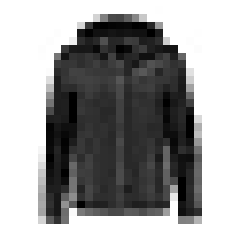

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [14]:
# Création des classes Fashion MNIST

class_names = ["T-shir/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
# Première image du JdE :
class_names[y_train[0]]

'Coat'

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_diagram


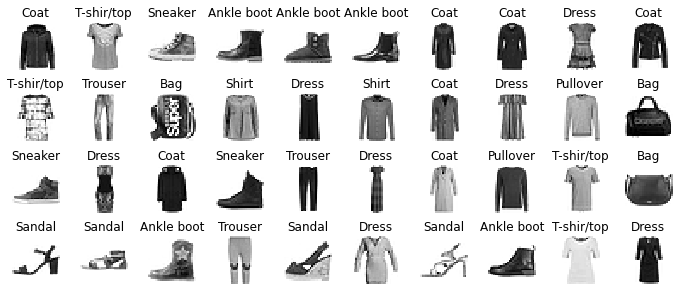

In [18]:
# Echantillon du dataset

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_diagram', tight_layout=False)
plt.show()

In [19]:
# Construction du NN :
#   MLP de classification avec deux hidden layers

model = keras.models.Sequential()   # Crée un modèle séquentiel (sequential API)
model.add(keras.layers.Flatten(input_shape=[28,28]))    # Première couche; flatten : image -> tab 1D + taille image
model.add(keras.layers.Dense(300, activation="relu"))   # couche cachée de 300 neurones avec relu comme fonction d'activation
model.add(keras.layers.Dense(100, activation="relu"))   # Pareil avec 100 neurones
model.add(keras.layers.Dense(10, activation="softmax")) # Output layer de 10 neurones (1/classe) avec softmax actfct car classes exclusives

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

On peut écrire plus rapidement avec cette forme :

In [21]:
"""model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[20,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])"""

'model = keras.models.Sequential([\n    keras.layers.Flatten(input_shape=[20,28]),\n    keras.layers.Dense(300, activation="relu"),\n    keras.layers.Dense(100, activation="relu"),\n    keras.layers.Dense(10, activation="softmax"),\n])'

In [22]:
model.layers

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


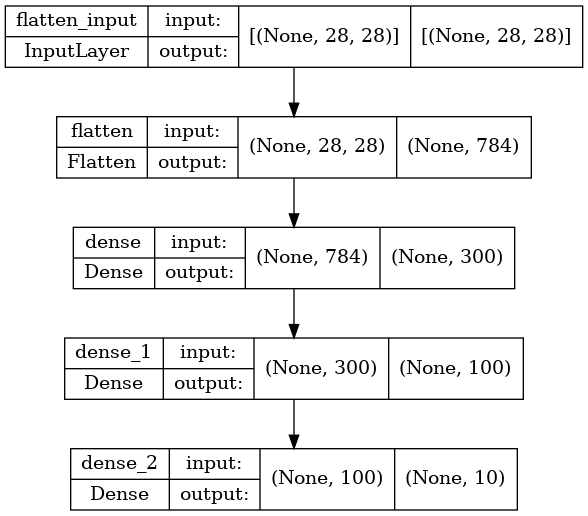

In [24]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [26]:
model.get_layer('dense') is hidden1

True

In [27]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00345001,  0.03906488, -0.00860477, ..., -0.01431732,
         0.01007375, -0.04536171],
       [-0.03421144, -0.01415566,  0.00210194, ...,  0.00597785,
         0.01081665,  0.00822836],
       [ 0.06223762,  0.01750418, -0.01628998, ..., -0.02498928,
        -0.03542241, -0.01588554],
       ...,
       [ 0.01112796,  0.02692425, -0.02590408, ...,  0.02467914,
         0.00459879, -0.02230794],
       [-0.05175987,  0.03147289, -0.03700026, ..., -0.04426921,
        -0.01684417,  0.01751773],
       [-0.05065023, -0.04271784,  0.01613566, ..., -0.05029618,
         0.0592075 ,  0.06584245]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
model.compile(
    loss="sparse_categorical_crossentropy", # à cause des sparse labels et des classes exclusives
    optimizer="sgd",                        # on utilise sgd, penser au learning rate
    metrics=["accuracy"]                    # c'est important de mesurer la précison pendant l'entrainement et l'évaluation
)

In [32]:
# Entrainement et évaluation du modèle



history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 2s 824us/step - loss: 0.7171 - accuracy: 0.7629 - val_loss: 0.5245 - val_accuracy: 0.8212
Epoch 2/50
1719/1719 [==============================] - 1s 786us/step - loss: 0.4857 - accuracy: 0.8305 - val_loss: 0.4385 - val_accuracy: 0.8526
Epoch 3/50
1719/1719 [==============================] - 1s 786us/step - loss: 0.4407 - accuracy: 0.8447 - val_loss: 0.5436 - val_accuracy: 0.7986
Epoch 4/50
1719/1719 [==============================] - 1s 786us/step - loss: 0.4143 - accuracy: 0.8555 - val_loss: 0.3947 - val_accuracy: 0.8680
Epoch 5/50
1719/1719 [==============================] - 1s 792us/step - loss: 0.3959 - accuracy: 0.8627 - val_loss: 0.3759 - val_accuracy: 0.8710
Epoch 6/50
1719/1719 [==============================] - 1s 801us/step - loss: 0.3773 - accuracy: 0.8675 - val_loss: 0.3720 - val_accuracy: 0.8750
Epoch 7/50
1719/1719 [==============================] - 1s 789us/step - loss: 0.3649 - accuracy: 0.8719 - val_loss: 0.3637 -

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


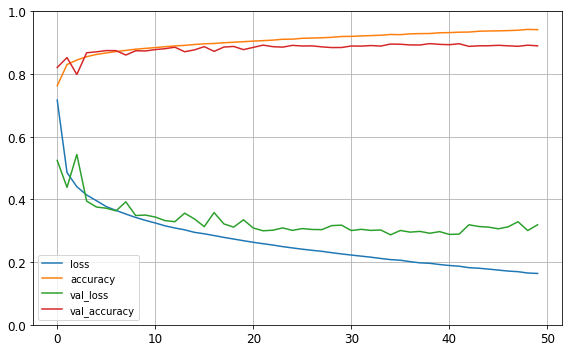

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 515us/step - loss: 0.3414 - accuracy: 0.8856


[0.341441810131073, 0.8855999708175659]

In [38]:
# réaliser des prédictions

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
# y_pred = model.predict_classes(X_new)
# Cette fonction a été supprimée dans la version 2.6 de TensorFlow

# Il faut faire à la pace :
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Regression MLP

avec le california housing set inclut dans sklearn

In [60]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

Différence avec ce qu'on a fait avant : l'output layer n'a qu'un seule neurone (puisqu'on ne veut prédire qu'une seule valeur), et n'utilise pas de fonction d'activation, et la fonction de perte est la MSE. Vu que le dataset est bruité, on va seulement utiliser une seule couche cachée avec moins de neurones que précédemment *pour éviter l'overfitting*.

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] # on fait comme s'il s'agissait de nouvelles instances

y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 587us/step - loss: 0.7294 - val_loss: 15.9921
Epoch 2/20
363/363 [==============================] - 0s 469us/step - loss: 0.6180 - val_loss: 9.6009
Epoch 3/20
363/363 [==============================] - 0s 458us/step - loss: 0.5292 - val_loss: 0.4534
Epoch 4/20
363/363 [==============================] - 0s 462us/step - loss: 0.3957 - val_loss: 0.3639
Epoch 5/20
363/363 [==============================] - 0s 478us/step - loss: 0.3849 - val_loss: 0.3605
Epoch 6/20
363/363 [==============================] - 0s 453us/step - loss: 0.3776 - val_loss: 0.3825
Epoch 7/20
363/363 [==============================] - 0s 465us/step - loss: 0.3765 - val_loss: 0.3767
Epoch 8/20
363/363 [==============================] - 0s 464us/step - loss: 0.3689 - val_loss: 0.3864
Epoch 9/20
363/363 [==============================] - 0s 466us/step - loss: 0.3649 - val_loss: 0.4068
Epoch 10/20
363/363 [==============================] - 0s 458us/step - loss: 0.36

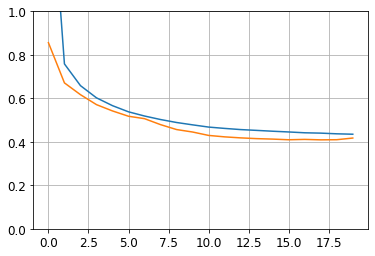

In [71]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [72]:
y_pred

array([[0.32774827],
       [1.9024163 ],
       [3.4076529 ]], dtype=float32)

L'API Sequential est simple à utiliser. Ce sont des modèles très courants. Cepdenant, si on veut contruire des NN avec des topologies plus complexes ou avec des inputs ou outputs multiples, il y a les Functionnals API.

## Functionals API

Connecte toutes les parties de l'input à l'output layer.
Permet au NN d'apprendre à la fois des deep patterns (chemin profond), et des règles simples (chemin court). (le MLP forçait les inputs à passer à travers toutes les couches, pouvant distordre les patterns simples).

Construction d'un NN pour s'occuper du problème California Housing :

In [73]:
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
# 1. Création de l'objet input.
#   C'est une spécification du type d'input que va receoir le modèle, comprenant sa shape et son dtype
#   Un modèle peut avoir plusieurs inputs

input_ = keras.layers.Input(shape=X_train.shape[1:])

# 2. Création de la layer Dense de 30 neurones avec relu comme fonction d'activation
#   On l'appelle comme une fonction, en lui passant l'input (d'où le nom Functional API)
#   On dit à Keras comment il doit connecter les layers ensemble ; aucune donnée n'est traitée pour l'instant.
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

# 3. Création d'une deuxième couche
#   Utilisée à nouveau comme une fonction.
#   On lui passe l'output de la couche précédente
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# 4. Création de la layer Concatenate
#   Utilisée comme une fonction, concatène l'input et l'output de la seconde layer
#   Possiblité d'utiliser la fonction keras.layers.concatenate(), qui crée une layer concatenate et l'appelle directement avec les inputs donnés. 
concat = keras.layers.Concatenate()([input_, hidden2])

# 5. Création de la layer ouput, avec un seul neurone et pas de fonction d'activation
#   On l'appele comme une fonction et on lui passe le résultat de la concaténation
output = keras.layers.Dense(1)(concat)

# 6. On crée notre modèle en lui spécifiant les inputs et output à utiliser.
model = keras.Model(inputs=[input_], outputs=[output])

# 7. Compilation du modèle, entraînement, évaluation, prédiction.

In [75]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_24 (Dense)               (None, 30)           270         ['input_5[0][0]']                
                                                                                                  
 dense_25 (Dense)               (None, 30)           930         ['dense_24[0][0]']               
                                                                                                  
 concatenate_5 (Concatenate)    (None, 38)           0           ['input_5[0][0]',                
                                                                  'dense_25[0][0]']         

In [76]:
model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 650us/step - loss: 0.6203 - val_loss: 2.3679
Epoch 2/20
363/363 [==============================] - 0s 541us/step - loss: 0.5372 - val_loss: 5.5043
Epoch 3/20
363/363 [==============================] - 0s 562us/step - loss: 0.6309 - val_loss: 8.1746
Epoch 4/20
363/363 [==============================] - 0s 529us/step - loss: 0.4514 - val_loss: 20.4770
Epoch 5/20
363/363 [==============================] - 0s 515us/step - loss: 0.4403 - val_loss: 39.8051
Epoch 6/20
363/363 [==============================] - 0s 529us/step - loss: 0.8949 - val_loss: 32.5544
Epoch 7/20
363/363 [==============================] - 0s 507us/step - loss: 1.1957 - val_loss: 1.1227
Epoch 8/20
363/363 [==============================] - 0s 503us/step - loss: 0.3812 - val_loss: 21.0446
Epoch 9/20
363/363 [==============================] - 0s 512us/step - loss: 0.3818 - val_loss: 11.5713
Epoch 10/20
363/363 [==============================] - 0s 507us/step - loss: 

Que se passe-t-il si on veut envoyer un sous ensemble des features à travers le grand chemin et un différent sous ensemble (overlap possible) dans le chemin profond ?

Schéma pour gérer les inputs multiples :

Input A =============================V

Input B ===> Hidden 1 ===> Hidden 2 ===> Concat ===> Output Layer ===>

On va envoyer 5 features à travers le grand chemin (0 à 4) et 6 dans le deep (2 à 7)

In [77]:
input_A = keras.layers.Input(shape=[5], name="wide_input")  # Penser à nommer les couches les plus importantes
input_B = keras.layers.Input(shape=[6], name="deep_input")  # particulièrement en cas de modèle complexe
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])    # On a deux inputs ici

Deux inputs impliquent d'appeler une seule matrice `X_train`, on va en passer deux (`X_train_A` et `X_train_B`) : une par input.
Cela s'applique également à `X_valid`, `X_test` et `X_new` quand on appelle `evaluate()` ou `predict()`

In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))  # On définit un learning rate

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_new[:, :5], X_new[:, 2:]

history = model.fit((X_train_A,X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 696us/step - loss: 1.7643 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 547us/step - loss: 0.7584 - val_loss: 0.6710
Epoch 3/20
363/363 [==============================] - 0s 575us/step - loss: 0.6584 - val_loss: 0.6169
Epoch 4/20
363/363 [==============================] - 0s 555us/step - loss: 0.6023 - val_loss: 0.5710
Epoch 5/20
363/363 [==============================] - 0s 558us/step - loss: 0.5663 - val_loss: 0.5420
Epoch 6/20
363/363 [==============================] - 0s 594us/step - loss: 0.5380 - val_loss: 0.5176
Epoch 7/20
363/363 [==============================] - 0s 544us/step - loss: 0.5187 - val_loss: 0.5065
Epoch 8/20
363/363 [==============================] - 0s 550us/step - loss: 0.5025 - val_loss: 0.4790
Epoch 9/20
363/363 [==============================] - 0s 527us/step - loss: 0.4889 - val_loss: 0.4564
Epoch 10/20
363/363 [==============================] - 0s 555us/step - loss: 0.478

Il existe plusieurs cas où on peut vouloir plusieurs output :
- La tâche le demande. Ex : localiser et classer l'objet principal dans une image (regression + classification)
- Dans le cas de plusieurs tâches indépendantes sur les mêmes données.
- En tant que technique de régularisation (entraîner des contraintes dont l'objectif est de réduire l'overfitting et d'améliorer la stabilité générale du modèle)

Pour ajouter un extra output : il suffit de le connecter aux layers appropriés et les ajouter à la liste des outputs du modèle.

Input A =============================V

Input B ===> Hidden 1 ===> Hidden 2 ===> Concat ===> Output Layer ===>

                                |===> Aux. Ouput  

In [79]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)

aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Chaque modèle aura besoin de sa propre loss function. Donc quand on on compile le modèle, on doit lui passer une liste des losses.

In [80]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Pour entraîner, on doit lui fournir un label pour chaque output. Dans notre cas, le main et le aux doivent prédire la même chose, donc ils doivent utiliser les mêmes labels.

In [81]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 1s 846us/step - loss: 0.9281 - dense_31_loss: 0.7711 - aux_output_loss: 2.3413 - val_loss: 1.7726 - val_dense_31_loss: 1.8508 - val_aux_output_loss: 1.0689
Epoch 2/20
363/363 [==============================] - 0s 621us/step - loss: 0.5190 - dense_31_loss: 0.4744 - aux_output_loss: 0.9204 - val_loss: 9.8483 - val_dense_31_loss: 10.8389 - val_aux_output_loss: 0.9323
Epoch 3/20
363/363 [==============================] - 0s 640us/step - loss: 0.5704 - dense_31_loss: 0.5438 - aux_output_loss: 0.8098 - val_loss: 0.5983 - val_dense_31_loss: 0.5748 - val_aux_output_loss: 0.8096
Epoch 4/20
363/363 [==============================] - 0s 640us/step - loss: 0.4518 - dense_31_loss: 0.4233 - aux_output_loss: 0.7082 - val_loss: 0.4883 - val_dense_31_loss: 0.4174 - val_aux_output_loss: 1.1265
Epoch 5/20
363/363 [==============================] - 0s 632us/step - loss: 0.4371 - dense_31_loss: 0.4144 - aux_output_loss: 0.6420 - val_loss: 0.4655 - val_d

In [83]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 427us/step - loss: 0.3603 - dense_31_loss: 0.3486 - aux_output_loss: 0.4658


## Construire des modèles dynamiques en utilisant le Subclassing API

Sequential API et Functional API sont tous les deux déclaratifs. Cela a de nombreux avantages :
- facile de sauvegarder le modèle, le cloner et le partager
- sa structure peut être affichée et analysée
- les erreurs peuvent être capturées avant le traitement des données
- facile à debug
Inconvénient : c'est statique.

Certains modèles impliquent des boucles, des formes qui varient, des branchements conditionnels, et d'autres comportements dynamiques => Subclassing API.

In [86]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

On utilise les arguments `input` pour la méthode `call()`.

Attention, l'architecture dans la méthode `call()` donc Keras ne peut pas facilment l'inspecter, il ne peut pas la sauvegarder ou la cloner, et elle n'apparaît pas quand on appelle la méthode `summary()`

In [87]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 847us/step - loss: 0.9399 - output_1_loss: 0.8268 - output_2_loss: 1.9579 - val_loss: 1.2866 - val_output_1_loss: 1.1465 - val_output_2_loss: 2.5472
Epoch 2/10
363/363 [==============================] - 0s 621us/step - loss: 0.5232 - output_1_loss: 0.4676 - output_2_loss: 1.0232 - val_loss: 0.5120 - val_output_1_loss: 0.4626 - val_output_2_loss: 0.9564
Epoch 3/10
363/363 [==============================] - 0s 620us/step - loss: 0.4733 - output_1_loss: 0.4369 - output_2_loss: 0.8009 - val_loss: 0.4329 - val_output_1_loss: 0.4008 - val_output_2_loss: 0.7217
Epoch 4/10
363/363 [==============================] - 0s 629us/step - loss: 0.4455 - output_1_loss: 0.4186 - output_2_loss: 0.6875 - val_loss: 0.4384 - val_output_1_loss: 0.4154 - val_output_2_loss: 0.6453
Epoch 5/10
363/363 [==============================] - 0s 639us/step - loss: 0.4319 - output_1_loss: 0.4094 - output_2_loss: 0.6350 - val_loss: 0.4188 - val_output_1_loss: 0.399

In [88]:
model = WideAndDeepModel(30, activation="relu")

## Sauvegarder et restaurer les modèles

In [89]:
np.random.seed(42)
tf.random.set_seed(42)

In [90]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [91]:
model.compile(loss="mse", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 699us/step - loss: 0.6710 - val_loss: 0.7166
Epoch 2/10
363/363 [==============================] - 0s 523us/step - loss: 0.4325 - val_loss: 1.6898
Epoch 3/10
363/363 [==============================] - 0s 519us/step - loss: 0.4295 - val_loss: 2.8628
Epoch 4/10
363/363 [==============================] - 0s 508us/step - loss: 0.3919 - val_loss: 2.1929
Epoch 5/10
363/363 [==============================] - 0s 519us/step - loss: 0.3809 - val_loss: 1.3409
Epoch 6/10
363/363 [==============================] - 0s 522us/step - loss: 0.3731 - val_loss: 0.3605
Epoch 7/10
363/363 [==============================] - 0s 510us/step - loss: 0.3664 - val_loss: 0.3711
Epoch 8/10
363/363 [==============================] - 0s 518us/step - loss: 0.3511 - val_loss: 0.3586
Epoch 9/10
363/363 [==============================] - 0s 532us/step - loss: 0.3462 - val_loss: 0.3573
Epoch 10/10
162/162 [==============================] - 0s 345us/step - loss: 0.334